# Student Dataset Data Cleaning

## Objective
Prepare a student dataset for machine learning by cleaning data and selecting relevant features.

In [7]:
import pandas as pd
stud_data=pd.read_csv("student-dataset.csv")
stud_data.head()

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5


In [8]:
stud_data.shape

(307, 16)

In [9]:
stud_data.columns

Index(['id', 'name', 'nationality', 'city', 'latitude', 'longitude', 'gender',
       'ethnic.group', 'age', 'english.grade', 'math.grade', 'sciences.grade',
       'language.grade', 'portfolio.rating', 'coverletter.rating',
       'refletter.rating'],
      dtype='object')

## Dataset Overview
Rows: 307
Columns: 16
This dataset contains student demographic, academic, and performance-related information.
Each row represents an individual student, while columns represent features such as grades, age, gender, and other attributes that influence academic outcomes.

## Step 1: CheckingMissing Values

In [10]:
stud_data.isna()

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [12]:
stud_data= stud_data.drop(columns=['ethnic.group'])

### Removing Irrelevant Columns
The column 'ethnic.group' was removed to avoid redundancy and potential bias,
and because it is not required for the current prediction task.


## STEP-2 Target Variable Selection
The target variable is language_grade because the goal is to predict students’ language performance based on their demographic and academic features.
Language performance is a meaningful outcome that reflects overall learning ability.


In [14]:
X = stud_data.drop(columns=['language.grade'])


In [15]:
y = stud_data['language.grade']

## STEP-3 Data Cleaning

In [17]:
numerical_cols = stud_data.select_dtypes(include=['int64','float64']).columns
stud_data[numerical_cols] = stud_data[numerical_cols].fillna(stud_data[numerical_cols].mean())


In [19]:
stud_data.isnull().sum()


id                    0
name                  0
nationality           0
city                  0
latitude              0
longitude             0
gender                0
age                   0
english.grade         0
math.grade            0
sciences.grade        0
language.grade        0
portfolio.rating      0
coverletter.rating    0
refletter.rating      0
dtype: int64

## Step 4: Feature Selection

In [21]:
X_selected = stud_data[['english.grade', 'math.grade']]

stud_data = stud_data.drop(columns=['id', 'name'], errors='ignore')


## Step 5: Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_selected.columns)
X_scaled_df.head()


,english.grade,math.grade
0,0.242250,0.600064
1,-0.873312,-0.450219
2,0.985958,0.810121
3,-0.129604,-1.290446
4,0.614104,-1.710559


## Step 6: Train–Test Split  
Train–test split ensures that the model is evaluated on unseen data, helping detect overfitting and ensuring generalization before actual ML training.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((245, 2), (62, 2), (245,), (62,))

## Step 7: Data Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


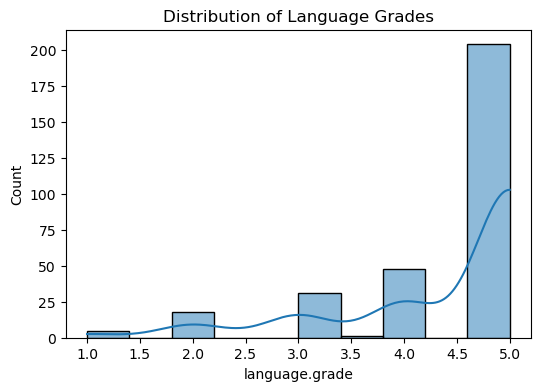

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(stud_data['language.grade'], bins=10, kde=True)
plt.title("Distribution of Language Grades")
plt.show()


## Observations

Most students score high in language.

Very few students score extremely low.

## Graph 2: Scatter Plot (Math vs Language Grade)

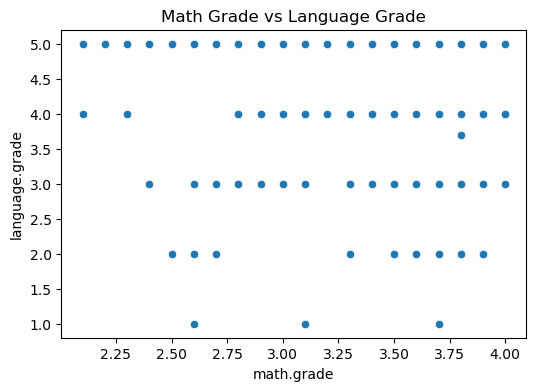

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=stud_data['math.grade'], y=stud_data['language.grade'])
plt.title("Math Grade vs Language Grade")
plt.show()


## Observations

Higher math scores generally align with higher language scores.

A few outliers indicate students strong in one subject but not the other.

## Step 8: Correlation Analysis
Correlation helps in ML by identifying influential features and removing redundant or irrelevant ones.

In [30]:
corr_matrix = stud_data.select_dtypes(include=['int64','float64']).corr()
corr_matrix


,latitude,longitude,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
latitude,1.000000,-0.022410,-0.013483,-0.055734,0.018960,0.049476,0.422806,-0.024638,-0.046231,-0.049537
longitude,-0.022410,1.000000,-0.001897,-0.077222,0.069241,-0.005642,-0.617455,0.050983,-0.035625,0.042415
age,-0.013483,-0.001897,1.000000,-0.001620,0.018438,-0.097152,0.026963,-0.051154,-0.050156,-0.033958
english.grade,-0.055734,-0.077222,-0.001620,1.000000,-0.011535,0.004804,0.031696,0.024681,-0.094754,-0.017596
math.grade,0.018960,0.069241,0.018438,-0.011535,1.000000,0.058225,-0.019699,0.102994,0.086612,-0.027108
sciences.grade,0.049476,-0.005642,-0.097152,0.004804,0.058225,1.000000,0.012119,0.058656,0.105307,0.006848
language.grade,0.422806,-0.617455,0.026963,0.031696,-0.019699,0.012119,1.000000,-0.034303,-0.046881,-0.042804
portfolio.rating,-0.024638,0.050983,-0.051154,0.024681,0.102994,0.058656,-0.034303,1.000000,-0.019461,0.019869
coverletter.rating,-0.046231,-0.035625,-0.050156,-0.094754,0.086612,0.105307,-0.046881,-0.019461,1.000000,0.040391
refletter.rating,-0.049537,0.042415,-0.033958,-0.017596,-0.027108,0.006848,-0.042804,0.019869,0.040391,1.000000


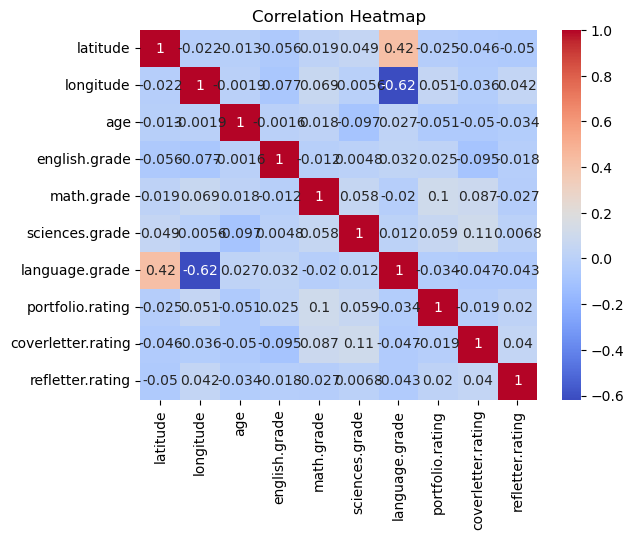

In [31]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Strong correlation: English grade - Language grade

### Weak correlation: Age - Language grade

### The dataset is now clean, consistent, numeric, scaled, and properly split, which are essential conditions for Machine Learning.
### This ensures accurate learning, faster convergence, and reliable evaluation when models are applied.